# Match Analysis

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [62]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [63]:
matches.shape

(756, 14)

In [64]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

## Taking in consideration MI VS RCB matches

In [65]:
RM =matches[np.logical_or(np.logical_and(matches['team1']=='Royal Challengers Bangalore',matches['team2']=='Mumbai Indians'),
                            np.logical_and(matches['team2']=='Royal Challengers Bangalore',matches['team1']=='Mumbai Indians'))]

In [66]:
RM.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium
37,2017,Mumbai,2017-05-01,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,bat,normal,0,Mumbai Indians,0,5,RG Sharma,Wankhede Stadium
63,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium
90,2008,Bangalore,2008-05-28,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,CRD Fernando,M Chinnaswamy Stadium
143,2009,Johannesburg,2009-05-03,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,9,JH Kallis,New Wanderers Stadium


In [67]:
RM.shape

(25, 14)

In [68]:
RM.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [69]:
RM.isnull().sum()

season             0
city               1
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [70]:
RM.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,25.0,14.12,19.912977,0.0,0.0,0.0,19.0,58.0
win_by_wickets,25.0,3.44,3.618011,0.0,0.0,4.0,6.0,9.0


### HEAD TO HEAD

Text(0.5, 1.0, 'MI VS RCB-head to head')

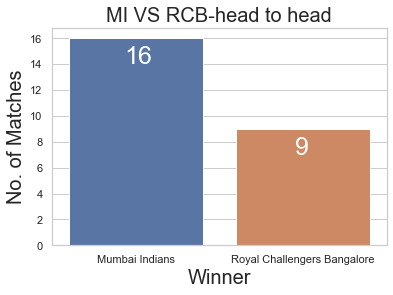

In [71]:
sns.countplot(RM["winner"])
plt.text(-0.07,14,str(RM['winner'].value_counts()['Mumbai Indians']),size=25,color='white')
plt.text(0.95,7,str(RM['winner'].value_counts()['Royal Challengers Bangalore']),size=25,color='white')
plt.xlabel('Winner',fontsize=20)
plt.ylabel('No. of Matches',fontsize=20)
plt.title('MI VS RCB-head to head',fontsize = 20)

In [72]:
Season_wise_Match_Winner = pd.DataFrame(RM.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between MI VS RCB :")
Season_wise_Match_Winner

Season wise winner of matches between MI VS RCB :


winner count
season winner                                   
2008   Mumbai Indians                          1
       Royal Challengers Bangalore             1
2009   Mumbai Indians                          1
       Royal Challengers Bangalore             1
2010   Mumbai Indians                          2
       Royal Challengers Bangalore             1
2011   Mumbai Indians                          1
       Royal Challengers Bangalore             1
2012   Mumbai Indians                          1
       Royal Challengers Bangalore             1
2013   Mumbai Indians                          1
       Royal Challengers Bangalore             1
2014   Mumbai Indians                          1
       Royal Challengers Bangalore             1
2015   Mumbai Indians                          1
       Royal Challengers Bangalore             1
2016   Mumbai Indians                          2
2017   Mumbai Indians                          2
2018   Mumbai Indians                          1
       Royal Challengers Bangalore             1
2019   Mumbai Indians                          2

## Winning Percentage

In [73]:
Winning_Percentage = RM['winner'].value_counts()/len(RM['winner'])

In [74]:
print("MI winning percentage against RCB(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("RCB winning percentage against MI(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

MI winning percentage against RCB(overall) : 64%
RCB winning percentage against MI(overall) : 36%


## Performance Analysis

In [75]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [76]:
performance("Mumbai Indians",RM)

Number of times given team win while defending : 8
Number of times given team win while chasing   : 8

Average runs by which a given team wins while defending  :  32.0
Average wickets by which a given team wins while chasing :  6.0


In [77]:
performance("Royal Challengers Bangalore",RM)

Number of times given team win while defending : 4
Number of times given team win while chasing   : 5

Average runs by which a given team wins while defending  :  24.0
Average wickets by which a given team wins while chasing :  7.0


## Toss Analysis

In [78]:
Toss_Decision = pd.DataFrame(RM.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner                 toss_decision               
Mumbai Indians              bat                        6
                            field                     10
Royal Challengers Bangalore bat                        2
                            field                      7

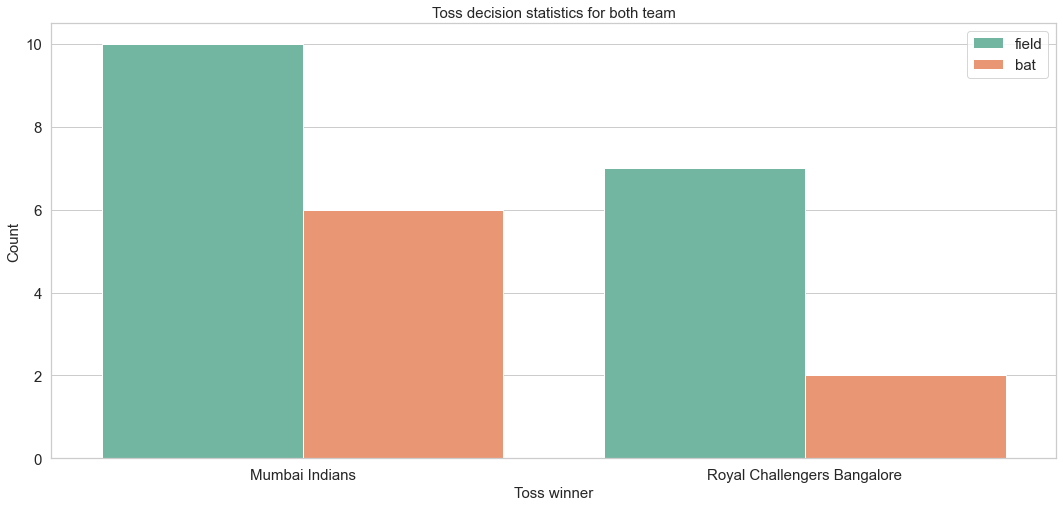

In [79]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(RM['toss_winner'],palette='Set2',hue=RM['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [80]:
Toss_Decision_based_Winner = pd.DataFrame(RM.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner                 toss_decision winner                             
Mumbai Indians              bat           Mumbai Indians                    3
                                          Royal Challengers Bangalore       3
                            field         Mumbai Indians                    7
                                          Royal Challengers Bangalore       3
Royal Challengers Bangalore bat           Mumbai Indians                    1
                                          Royal Challengers Bangalore       1
                            field         Mumbai Indians                    5
                                          Royal Challengers Bangalore       2

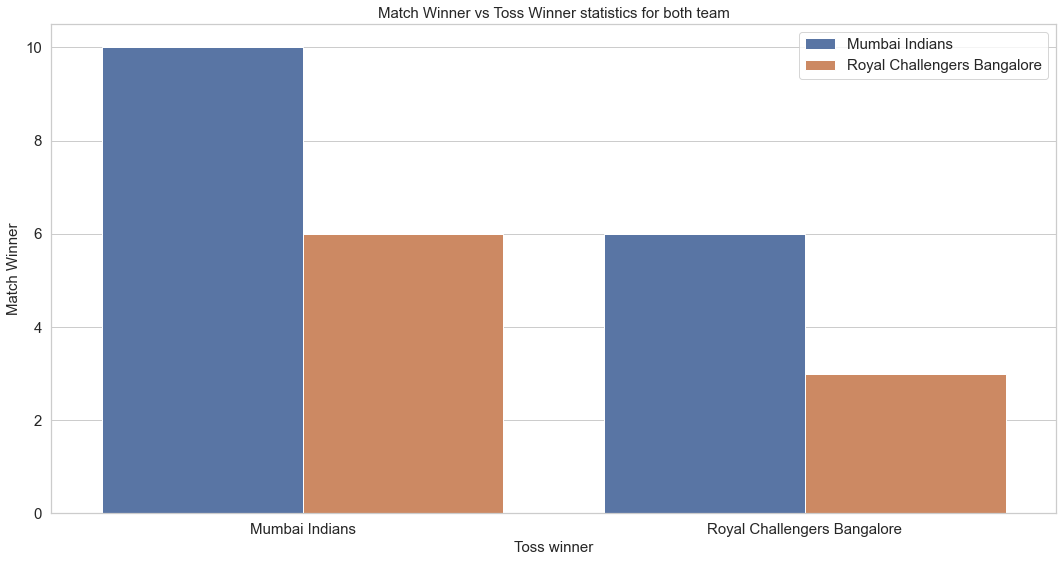

In [81]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(RM['toss_winner'],hue=RM['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

### Toss Decision based Analysis of both the teams seperately :


In [82]:
MI = RM[RM["toss_winner"]=="Mumbai Indians"]
RCB = RM[RM["toss_winner"]=="Royal Challengers Bangalore"]

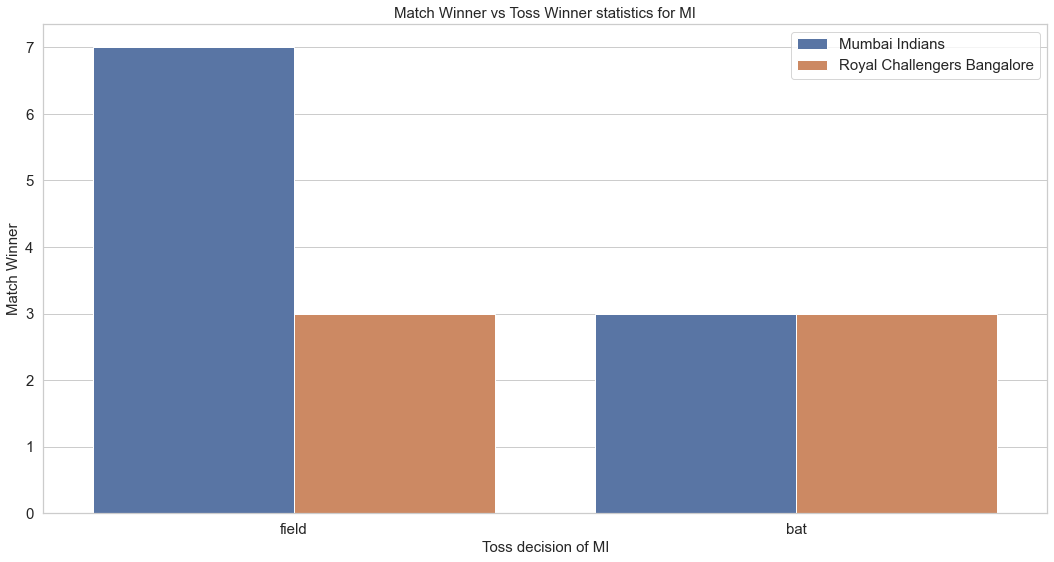

In [83]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(MI['toss_decision'],hue=MI['winner'])
plt.title('Match Winner vs Toss Winner statistics for MI',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of MI',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

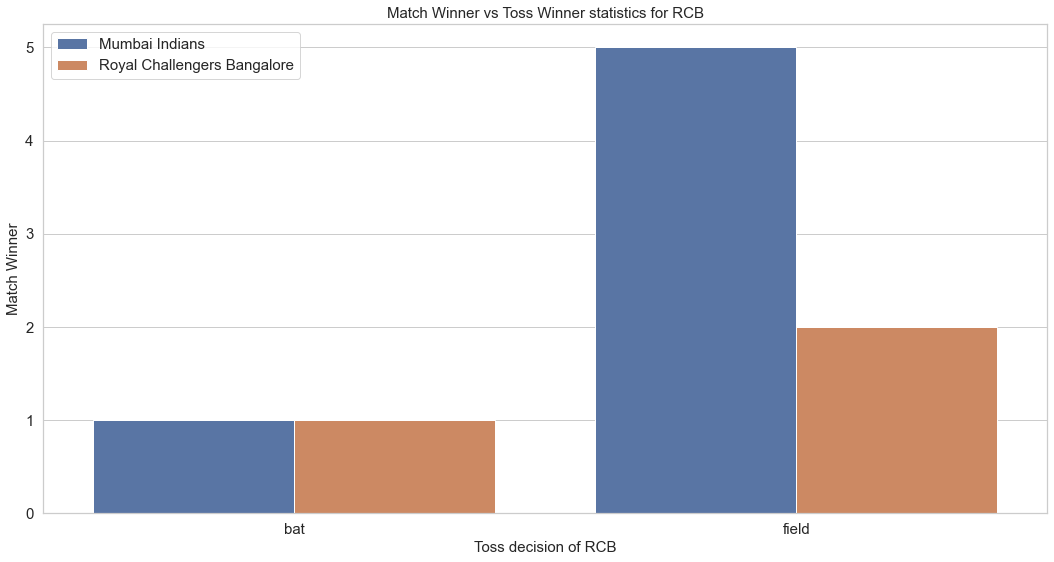

In [84]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(RCB['toss_decision'],hue=RCB['winner'])
plt.title('Match Winner vs Toss Winner statistics for RCB',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of RCB',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

In [85]:
player_of_the_match = pd.DataFrame(RM.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
RG Sharma,4
CH Gayle,3
JH Kallis,2
KA Pollard,2
KH Pandya,1
CRD Fernando,1
AT Rayudu,1
MV Boucher,1
SL Malinga,1
AB de Villiers,1


## Recent Year Performance Analysis

In [86]:
cond2 = RM["season"] == 2018
cond3 = RM["season"] == 2019
final = RM[cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7907,2018,Mumbai,17/04/18,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Mumbai Indians,46,0,RG Sharma,Wankhede Stadium
7924,2018,Bengaluru,01/05/18,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,14,0,TG Southee,M Chinnaswamy Stadium
11143,2019,Bengaluru,28/03/19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Mumbai Indians,6,0,JJ Bumrah,M. Chinnaswamy Stadium
11322,2019,Mumbai,15/04/19,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SL Malinga,Wankhede Stadium


In [87]:
final.shape

(4, 14)

In [88]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
SL Malinga,1
JJ Bumrah,1
TG Southee,1
RG Sharma,1


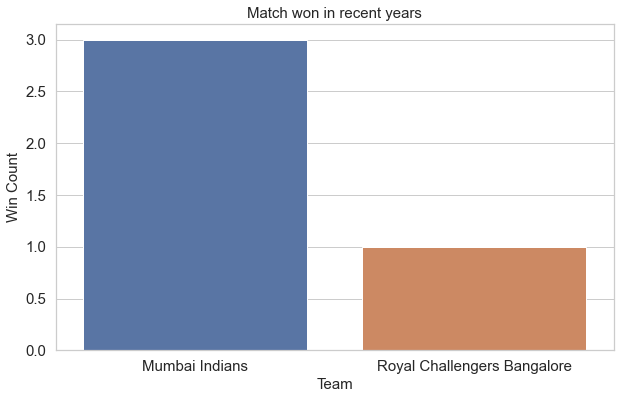

In [89]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)

plt.show()

From all the above analysis related to Head to Head , Toss analysis, Performance Analysis, Recent year analysis etc we can predict that chasing side has better chances of winning the match and MI will be favorite for this match considering their past performance against RCB.